In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [81]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

Divide dataset into training and testing

In [82]:
batch_size=32
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(165,165),
  batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [83]:
testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(165,165),
  batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


Number of possible labels

In [84]:
class_names = train_dataset.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Training The ResNet50 Model and another CNN model


Resnet50

In [87]:
resnet50_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(165,165,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet50_model.add(pretrained_model)
resnet50_model.add(Flatten())
resnet50_model.add(Dense(512, activation='relu'))
resnet50_model.add(Dense(5, activation='softmax'))

In [67]:
resnet50_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_12 (ModuleWr  (None, 2048)             0         
 apper)                                                          
                                                                 
 module_wrapper_13 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                                                                 
 module_wrapper_14 (ModuleWr  (None, 5)                2565      
 apper)                                                          
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
__________________________________

In [88]:
resnet50_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [89]:
history_resnet50 = resnet50_model.fit(train_dataset, validation_data=testing_dataset,epochs=10)


Epoch 1/10
92/92 [==============================] - 14s 106ms/step - loss: 0.7479 - accuracy: 0.7585 - val_loss: 0.4413 - val_accuracy: 0.8447
Epoch 2/10
71/92 [======================>.......] - ETA: 1s - loss: 0.3125 - accuracy: 0.8829

KeyboardInterrupt: ignored

VGG 16 Model

In [74]:
vgg16_model = Sequential()

pretrained_model= tf.keras.applications.VGG19(include_top=False,
                   input_shape=(165,165,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

vgg16_model.add(pretrained_model)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation='relu'))
vgg16_model.add(Dense(5, activation='softmax'))

80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
vgg16_model.summary()

In [76]:
vgg16_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [77]:
history_vgg16 = vgg16_model.fit(train_dataset, validation_data=testing_dataset,epochs=10)


Epoch 1/10
92/92 [==============================] - 19s 169ms/step - loss: 1.4097 - accuracy: 0.7234 - val_loss: 0.9543 - val_accuracy: 0.7861
Epoch 2/10
92/92 [==============================] - 12s 129ms/step - loss: 0.4129 - accuracy: 0.8733 - val_loss: 0.6633 - val_accuracy: 0.8256
Epoch 3/10
92/92 [==============================] - 13s 131ms/step - loss: 0.1881 - accuracy: 0.9319 - val_loss: 0.6143 - val_accuracy: 0.8406
Epoch 4/10
92/92 [==============================] - 12s 129ms/step - loss: 0.0789 - accuracy: 0.9789 - val_loss: 0.6406 - val_accuracy: 0.8365
Epoch 5/10
92/92 [==============================] - 12s 127ms/step - loss: 0.0400 - accuracy: 0.9905 - val_loss: 0.6514 - val_accuracy: 0.8311
Epoch 6/10
92/92 [==============================] - 12s 128ms/step - loss: 0.0204 - accuracy: 0.9980 - val_loss: 0.6672 - val_accuracy: 0.8324
Epoch 7/10
92/92 [==============================] - 12s 126ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.6866 - val_accuracy: 0.8297

# Evaluating The Model

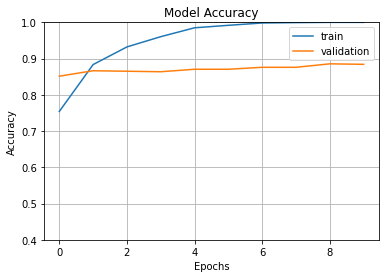

In [70]:
plt.plot(history_resnet50.history['accuracy'])
plt.plot(history_resnet50.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

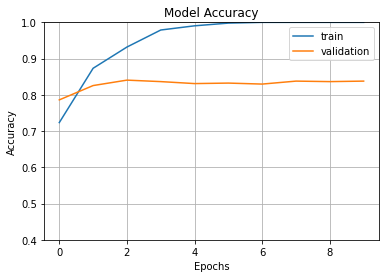

In [78]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
plt.plot(history_resnet50.history['loss'])
plt.plot(history_resnet50.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

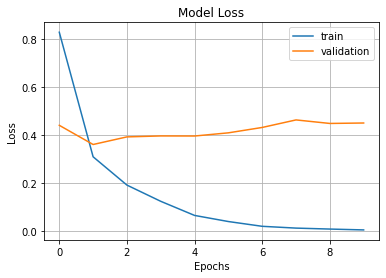

In [71]:
plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [45]:
import cv2
image=cv2.imread('sunflower.jpg')
image_resized= cv2.resize(image, (200,200))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 200, 200, 3)


In [46]:
pred=resnet50_model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[4.6048468e-04 3.4056646e-07 2.6270334e-04 9.9927336e-01 3.1835705e-06]]


In [47]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is sunflowers
